In [1]:
import os
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'datasets',
 'decisionTree.ipynb',
 'K_NNAlgo.ipynb',
 'linearRegression.ipynb',
 'svmClassifier.ipynb']

In [2]:
# import the required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# inline the plots

In [5]:
%matplotlib inline

In [6]:
# load the dataset

In [7]:
df=pd.read_csv('./datasets/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
X=df.iloc[:,2:4].values
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [11]:
y=df['Purchased'].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [14]:
X_train

array([[-0.25823577, -0.29718043],
       [ 0.87505035, -1.47158022],
       [-0.06935475,  0.01790244],
       [ 1.15837188, -1.01327786],
       [-1.10820036,  0.418917  ],
       [ 1.15837188,  0.47620479],
       [-0.16379526, -0.55497551],
       [-0.06935475,  0.24705361],
       [-0.82487883, -0.29718043],
       [ 2.10277698,  1.04908274],
       [-1.01375985,  0.53349259],
       [ 1.25281239,  2.13755083],
       [-0.06935475,  0.07519023],
       [-0.06935475,  0.16112192],
       [-0.73043832,  1.27823391],
       [ 0.21396678,  0.10383413],
       [ 0.96949086,  1.99433134],
       [ 0.11952627,  0.16112192],
       [ 1.3472529 ,  1.22094612],
       [ 1.3472529 ,  2.25212642],
       [-1.39152189, -0.23989264],
       [-0.25823577, -1.38564853],
       [-1.01375985, -1.15649735],
       [-0.73043832, -0.6409072 ],
       [-1.67484342,  0.30434141],
       [-1.58040291,  0.47620479],
       [-1.67484342, -1.38564853],
       [ 0.78060984,  0.47620479],
       [ 2.00833647,

In [15]:
X_test

array([[ 0.11952627,  0.04654633],
       [ 0.4028478 , -0.21124874],
       [ 0.11952627, -0.01074146],
       [-1.76928393, -1.50022412],
       [-1.29708138, -0.38311213],
       [ 0.30840729, -0.35446823],
       [ 0.4028478 ,  0.10383413],
       [-0.25823577, -0.01074146],
       [-0.16379526,  0.79128766],
       [ 1.44169341,  2.05161914],
       [ 2.10277698, -0.72683889],
       [ 0.4028478 , -0.49768771],
       [-0.63599781,  1.33552171],
       [ 0.4028478 , -0.49768771],
       [ 0.02508576, -0.01074146],
       [-1.10820036, -1.61479971],
       [-0.25823577, -0.41175602],
       [-0.73043832,  1.82246796],
       [-0.82487883,  0.24705361],
       [-0.25823577,  0.16112192],
       [-0.25823577, -0.52633161],
       [ 1.72501494, -0.32582433],
       [-1.29708138,  0.50484869],
       [-0.91931934, -0.46904382],
       [ 0.87505035, -0.58361941],
       [ 0.11952627,  0.10383413],
       [ 0.87505035, -1.32836073],
       [ 1.06393137, -0.92734617],
       [-0.5415573 ,

In [16]:
# Implement SVM classifier

In [17]:
from sklearn.svm import SVC

In [18]:
classifier=SVC(kernel='linear')
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [20]:
y_predicted=classifier.predict(X_test)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix accuracy_score
cm=confusion_matrix(y_test,y_predicted)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


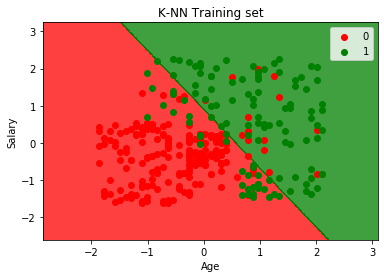

In [23]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_point, y_point = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_point[:, 0].min() - 1, stop = X_point[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_point[:, 1].min() - 1, stop = X_point[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_point)):
    plt.scatter(X_point[y_point == j, 0], X_point[y_point == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN Training set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

In [27]:
cm

array([[51,  0],
       [17, 12]], dtype=int64)